In [162]:
#
# hw5pr2digits:  digits clasification via decision trees and random forests...
#

In [163]:
#
# Let's use the data to create "more informed" models
#

In [164]:
# libraries!
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

In [165]:
# let's read in our flower data...
# 
# for read_csv, use header=0 when row 0 is a header row
# 
filename = 'titanic.csv'
df = pd.read_csv(filename, header=0)   # encoding="latin1" et al.
print(f"{filename} : file read into a pandas dataframe.")

# [[ for hw5pr1's conversion:  the new file will be needed here ]]

titanic.csv : file read into a pandas dataframe.


In [166]:
#
# a dataframe is a "spreadsheet in Python"   (seems to have an extra column!)
#
pd.set_option('display.max_rows', 10)     # None for no limit; default: 10
# pd.set_option('display.min_rows', 150)   # min_rows is not universally supported...
# let's view it!
df

# [[ for hw5pr1's conversion:  no changes needed here ]]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,the original Kaggle dataset! Adapted from here: https://www.kaggle.com/c/titanic
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",NaN
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",NaN
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",NaN
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",NaN
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,NaN
1263,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,NaN
1264,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,NaN
1265,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,NaN


In [167]:
#
# let's look at our pandas dataframe   (Aargh: that extra column!)
#
df.info()

# [[ for hw5pr1's conversion:  no changes needed here ]]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 15 columns):
 #   Column                                                                                Non-Null Count  Dtype  
---  ------                                                                                --------------  -----  
 0   pclass                                                                                1267 non-null   int64  
 1   survived                                                                              1267 non-null   int64  
 2   name                                                                                  1267 non-null   object 
 3   sex                                                                                   1267 non-null   object 
 4   age                                                                                   1004 non-null   float64
 5   sibsp                                                                              

In [168]:
#
# ok!  let's drop columns that are
#      + "cheating"  (they give away the answer and wouldn't be available)
#      + too sparse  (too many NAs)
#


# the "boat" column is present when the lifeboat number is known: too much info!
df_2 = df.drop('boat', axis=1)     # or, axis = 1 indicates we want to drop a column, not a row

# the "cabin" column has too many missing values...
df_2 = df_2.drop('cabin', axis=1)

df_2 = df_2.drop('body', axis=1) 
df_2 = df_2.drop('fare', axis=1)
df_2 = df_2.drop('ticket', axis=1)
df_2 = df_2.drop('name', axis=1)
df_2 = df_2.drop('home.dest', axis=1)
df_clean = df_2.drop('embarked', axis=1)

COLUMNS = df_clean.columns    
last_column = COLUMNS[-1]  # don't want the "url" column...

df_clean = df_clean.drop(columns=[last_column])  # drop by name is ok

# let's see what's there...
df_clean.info()  # re-look at the data ...    
# + some will still have too many NA's!
# + some will still be "cheating"
# + some simply won't be worth having

df_clean.head()

# [[ for hw5pr1's conversion:  there's a different column to drop... ]]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1267 non-null   int64  
 1   survived  1267 non-null   int64  
 2   sex       1267 non-null   object 
 3   age       1004 non-null   float64
 4   sibsp     1267 non-null   int64  
 5   parch     1267 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 59.5+ KB


,pclass,survived,sex,age,sibsp,parch
0,1,1,female,29.0000,0,0
1,1,1,male,0.9167,1,2
2,1,0,female,2.0000,1,2
3,1,0,male,30.0000,1,2
4,1,0,female,25.0000,1,2


In [169]:
# #
# # let's keep our column names in variables, for reference
# #
# COLUMNS = df_clean.columns            # "list" of columns
# print(f"COLUMNS is {COLUMNS}\n")  
#   # It's a "pandas" list, called an Index
#   # use it just as a Python list of strings:
# print(f"COLUMNS[0] is {COLUMNS[0]}\n")

# # let's create a dictionary to look up any column index by name
# COL_INDEX = {}
# for i, name in enumerate(COLUMNS):
#     COL_INDEX[name] = i  # using the name (as key), look up the value (i)
# print(f"COL_INDEX is {COL_INDEX}")

# # [[ for hw5pr1's conversion:  no changes needed here ]]

In [170]:
#
# let's look at our cleaned-up dataframe...
#
df_clean.info()   
#
# notice that the non-null is _different_ for irisname!
df_clean   # show a table! (the problem rows are the last two...)

# [[ for hw5pr1's conversion:  no changes needed here ]]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1267 non-null   int64  
 1   survived  1267 non-null   int64  
 2   sex       1267 non-null   object 
 3   age       1004 non-null   float64
 4   sibsp     1267 non-null   int64  
 5   parch     1267 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 59.5+ KB


,pclass,survived,sex,age,sibsp,parch
0,1,1,female,29.0000,0,0
1,1,1,male,0.9167,1,2
2,1,0,female,2.0000,1,2
3,1,0,male,30.0000,1,2
4,1,0,female,25.0000,1,2
...,...,...,...,...,...,...
1262,3,0,female,14.5000,1,0
1263,3,0,female,NaN,1,0
1264,3,0,male,26.5000,0,0
1265,3,0,male,27.0000,0,0


In [171]:
#
# typically, after dropping columns we don't want, 
#   we drop rows with missing data (other approaches are possible, too)
#
df_full = df_clean.dropna()   # this removes all rows with missing data ("na")
df_full.info()                # it's "full" because it has no missing data
df_full
#
# notice that _all_ of the rows now have 142 non-null items
#    also, the last row isn't real data... we'll handle it next

# [[ for hw5pr1's conversion:  no changes needed here ]]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1004 entries, 0 to 1266
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1004 non-null   int64  
 1   survived  1004 non-null   int64  
 2   sex       1004 non-null   object 
 3   age       1004 non-null   float64
 4   sibsp     1004 non-null   int64  
 5   parch     1004 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 54.9+ KB


,pclass,survived,sex,age,sibsp,parch
0,1,1,female,29.0000,0,0
1,1,1,male,0.9167,1,2
2,1,0,female,2.0000,1,2
3,1,0,male,30.0000,1,2
4,1,0,female,25.0000,1,2
...,...,...,...,...,...,...
1259,3,0,male,45.5000,0,0
1262,3,0,female,14.5000,1,0
1264,3,0,male,26.5000,0,0
1265,3,0,male,27.0000,0,0


In [172]:
# 
# get rid of last row!
#
# df_final = df_full.iloc[0:-1]     # not the syntax I would choose
# print(df_final.shape)
# df_final

# [[ for hw5pr1's conversion:  many "wrong" rows are scattered throughout births.csv;
#     however, it's totally ok to keep them for hw5pr1's purposes! (up to you) ]]

In [173]:
#
# everything needs to be numeric! we'll convert female/male to 1/0
#

def numberize(s):
    """ converts 'male'/'female' to 0/1 """
    if s == 'female': return 1
    else:  return 0                   # or return int(s=='female')

df_full['sex'] = df_full['sex'].apply(numberize)

# can't run this cell twice!   (we've replaced things!)
    
# [[ for hw5pr1's conversion:  it's good to have SPECIES!
#      This will need updating for the "above median" and "below median" species ]] 

<ipython-input-173-ea95774fcd04>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full['sex'] = df_full['sex'].apply(numberize)


In [174]:
#
# we can "apply" a function to a whole column
#   it may give a warning; here, this is ok ...
#

# df_final['number'] = df_final['number'].apply(convert_species)

# Don't run this twice: the data will be different the second time!
#   (In reality, feel free to go back and re-run cells to re-establish things... :-)
#    Don't worry about the (possible)  "SettingWithCopyWarning" here...

# [[ for hw5pr1's conversion:  you may or may not need this... ]]

In [175]:
#
# let's see it!  (this is safe to run many times...)

# print(df_final.to_string())  # for _all_ rows...

# [[ for hw5pr1's conversion:  no changes needed ]]

In [176]:
#
# let's keep our column names in variables, for reference
#
df_xOnly = df_full.drop('survived', axis=1)
COLUMNS = df_xOnly.columns          # "list" of feature columns. Does not include survived

print(f"COLUMNS is {COLUMNS}\n")  
  # It's a "pandas" list, called an Index
  # use it just as a Python list of strings:
print(f"COLUMNS[0] is {COLUMNS[0]}\n")

# let's create a dictionary to look up any column index by name
COL_INDEX = {}
for i, name in enumerate(COLUMNS):
    COL_INDEX[name] = i  # using the name (as key), look up the value (i)
print(f"COL_INDEX is {COL_INDEX}")

COLUMNS is Index(['pclass', 'sex', 'age', 'sibsp', 'parch'], dtype='object')

COLUMNS[0] is pclass

COL_INDEX is {'pclass': 0, 'sex': 1, 'age': 2, 'sibsp': 3, 'parch': 4}


In [177]:
#
# let's convert our dataframe to a numpy array, named A
#    Our ML library, scikit-learn operates entirely on numpy arrays.
#


# Get numpy array version of dataframe 
A = df_full.values    # .values gets the numpy array
A = A.astype('float64')
print(f"A is {A}")
NUM_ROWS, NUM_COLS = A.shape
print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")
print("+++ Start of data definitions +++\n")

x_all = np.append(A[:,0:1], A[:,2:], 1)  # X (features) 
y_all = A[:, 1]    # y (labels) 

print(f"x_all (just features) is \n {x_all}")
print(f"y_all (just labels)   is \n {y_all}")

print(A)

# [[ for hw5pr1's conversion:  no changes needed ]]

A is [[ 1.      1.      1.     29.      0.      0.    ]
 [ 1.      1.      0.      0.9167  1.      2.    ]
 [ 1.      0.      1.      2.      1.      2.    ]
 ...
 [ 3.      0.      0.     26.5     0.      0.    ]
 [ 3.      0.      0.     27.      0.      0.    ]
 [ 3.      0.      0.     29.      0.      0.    ]]

The dataset has 1004 rows and 6 cols
+++ Start of data definitions +++

x_all (just features) is 
 [[ 1.      1.     29.      0.      0.    ]
 [ 1.      0.      0.9167  1.      2.    ]
 [ 1.      1.      2.      1.      2.    ]
 ...
 [ 3.      0.     26.5     0.      0.    ]
 [ 3.      0.     27.      0.      0.    ]
 [ 3.      0.     29.      0.      0.    ]]
y_all (just labels)   is 
 [1. 1. 0. ... 0. 0. 0.]
[[ 1.      1.      1.     29.      0.      0.    ]
 [ 1.      1.      0.      0.9167  1.      2.    ]
 [ 1.      0.      1.      2.      1.      2.    ]
 ...
 [ 3.      0.      0.     26.5     0.      0.    ]
 [ 3.      0.      0.     27.      0.      0.    ]
 [ 3.   

In [178]:
#
# let's make sure it's all floating-point, so we can multiply and divide
#
# A = A.astype('float64')  # so many:  www.tutorialspoint.com/numpy/numpy_data_types.htm
# print(A)

# [[ for hw5pr1's conversion:  no changes needed ]]

In [179]:
#
# nice to have NUM_ROWS and NUM_COLS around
#
# NUM_ROWS, NUM_COLS = A.shape
# print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")

# [[ for hw5pr1's conversion:  no changes needed ]]

In [180]:
# # let's use all of our variables, to reinforce names...

# # choose a row index, n:
# n = 5
# print(f"row #{n} is {A[n]}")

# for i in range(len(COLUMNS)):
#     colname = COLUMNS[i]
#     if colname != 'actual_digit':
#         print(f"  Its {colname} is {A[n][i]}")
#     else:
#         species_num = int(A[n][i])
#         species = NUMBER[species_num]
#         print(f"  Its {colname} is {species} ({species_num})")

In [181]:
#
# we could write-our-own, but we don't have to! Let's "library"! After all,
#
#     the representation and storage for the trees is a big task
#     we want an already-debugged algorithm!
#     we want to ask q'ns about irises and how "classifiable" they are, 
#        rather than questions about implementation (at least for this moment...)
#

In [182]:
# print("+++ Start of data definitions +++\n")

# x_all = A[:,0:64]  # X (features) 
# y_all = A[:,64]    # y (labels) 

# print(f"X_all (just features) is \n {X_all}")
# print(f"y_all (just labels)   is \n {y_all}")

In [183]:
#
# we can re-weight different features here...
#

In [184]:
#
# we scramble the data, to give a different TRAIN/TEST split each time...
# 
indices = np.random.permutation(len(y_all))  # indices is a permutation-list

# we scramble both X and y, necessarily with the same permutation
x_labeled = x_all[indices]              # we apply the _same_ permutation to each!
y_labeled = y_all[indices]              # again...
print(x_labeled)
print(y_labeled)

# [[ for hw5pr1's conversion:  no changes needed ]] 

[[ 2.   1.  28.   0.   0. ]
 [ 3.   0.  17.   1.   0. ]
 [ 3.   0.  23.   0.   0. ]
 ...
 [ 1.   0.  49.   1.   0. ]
 [ 1.   0.  45.5  0.   0. ]
 [ 3.   0.  32.   0.   0. ]]
[1. 0. 0. ... 1. 0. 1.]


In [185]:
#
# We next separate into test data and training data ... 
#    + We will train on the training data...
#    + We will _not_ look at the testing data to build the model
#
# Then, afterward, we will test on the testing data -- and see how well we do!
#

#
# a common convention:  train on 80%, test on 20%    Let's define the TEST_PERCENT
#
NUM_ROWS = x_labeled.shape[0]     # the number of labeled rows
TEST_PERCENT = 0.20
TEST_SIZE = int(TEST_PERCENT*NUM_ROWS)   # no harm in rounding down

x_test = x_labeled[:TEST_SIZE]    # first section are for testing
y_test = y_labeled[:TEST_SIZE]

x_train = x_labeled[TEST_SIZE:]   # all the rest are for training
y_train = y_labeled[TEST_SIZE:]

print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows" )

# [[ for hw5pr1's conversion:  no changes needed ]] 

training with 804 rows;  testing with 200 rows


In [186]:
print(f"y_test is {y_test}")
print(f"y_train is {y_train}")   # to "get a visual" on these...
# print(x_test)
# print(x_train)

# [[ for hw5pr1's conversion:  no changes needed ]] 

y_test is [1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1.
 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0.
 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1.
 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 1. 0. 0.]
y_train is [1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0.
 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1.
 0. 

In [187]:
#
# +++ This is the "Model-building and Model-training Cell"
#       
# Create a DT model and train it! 
#
from sklearn import tree      # for decision trees

best_depth = 1   # we don't know what depth to use, so we guess...
dtree_model = tree.DecisionTreeClassifier(max_depth=best_depth)

# we train the model (it's one line!)
dtree_model.fit(x_train, y_train)                              # yay!  trained!
print("Created and trained a DT classifier with max depth =", best_depth) 

# [[ for hw5pr1's conversion:  no changes needed ]] 

Created and trained a DT classifier with max depth = 1


In [188]:
SPECIES = ['not survived', 'survived']   # int to str
SPECIES_INDEX = {'not survived':0,'survived':1}  # str to int

def convert_species(speciesname):
    """ return the species index (a unique integer/category) """
    #print(f"converting {speciesname}...")
    return SPECIES_INDEX[speciesname]

# Let's try it out...
for name in SPECIES:
    print(f"{name} maps to {convert_species(name)}")

not survived maps to 0
survived maps to 1


In [189]:
#
# Function to print testing results in a vertical table (or, an excuse to f-string?)
#

def compare_labels(predicted_labels, actual_labels):
    """ a more neatly formatted comparison """
    SPECIES_LABELS = len(predicted_labels)
    species_correct = 0
    
    for i in range(SPECIES_LABELS):
        p = int(round(predicted_labels[i]))         # round protects from fp error 
        a = int(round(actual_labels[i]))
        result = "incorrect"
        if p == a:  # if they match,
            result = ""       # no longer incorrect
            species_correct += 1  # and we count a match!
        
        print(f"row {i:>3d} : {SPECIES[p]:>12s} {SPECIES[a]:<12s}   {result}")   

    print()
    print("Correct:", species_correct, "out of", SPECIES_LABELS)
    return species_correct

# [[ for hw5pr1's conversion:  a _few_ changes needed, 
#     depending on whether you defined SPECIES and the d/s datatypes ]] 

In [190]:
#
# +++ This is the "Model-testing Cell"
#
# Now, let's see how well we did on our "held-out data" (the testing data)
#

# We run our test set!
predicted_labels = dtree_model.predict(x_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels, actual_labels)

# [[ for hw5pr1's conversion:  no changes needed, as long as compare_labels is set ]]

Predicted labels: [1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 1. 1. 0. 0.]
Actual  labels  : [1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1.
 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1

160

In [191]:
print(COLUMNS)

Index(['pclass', 'sex', 'age', 'sibsp', 'parch'], dtype='object')


In [192]:
#
# let's see the tree!
#

filename = 'tree_depth_' + str(best_depth) + '.gv'  # preferred over .dot

tree.export_graphviz(dtree_model, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS, # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=SPECIES,      # good to have   
                            leaves_parallel=True )    # lots of options!

print(f"file {filename} written. Try copying the result to http://viz-js.com/ \n")

with open(filename, "r") as f:
    file_text = f.read()
    print(file_text)
    
#
# Lab task:  build three trees at depths 1, 2, and 3 (submit with the notebooks!)
#

# [[ for hw5pr1's conversion:  no changes needed, as long as you have SPECIES ]]

file tree_depth_1.gv written. Try copying the result to http://viz-js.com/ 

digraph Tree {
node [shape=box, style="filled", color="black"] ;
graph [ranksep=equally, splines=polyline] ;
0 [label="sex <= 0.5\ngini = 0.485\nsamples = 804\nvalue = [471, 333]\nclass = not survived", fillcolor="#f7dac5"] ;
1 [label="gini = 0.339\nsamples = 505\nvalue = [396, 109]\nclass = not survived", fillcolor="#eca46f"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.376\nsamples = 299\nvalue = [75, 224]\nclass = survived", fillcolor="#7bbeee"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
{rank=same ; 0} ;
{rank=same ; 1; 2} ;
}


In [193]:
#
# Now, to TUNE the model (with cross-validation)...
#
#
# We used a depth of 1    (only 1 split) 
# There's no way to model three species with only 1 split!
#
# So, we try several depths...
# Here, the tradeoff is not so much "more accurate" 
#       + deeper always has the potential to be more accurate
#       + at the risk of overfitting the training data!
#
# Rather it's the underfitting(bias)/overfitting(variance) tradeoff
#

In [194]:
#
# So, to compare different depths, let's use cross validation
#

from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#

best_accuracy = 0
for d in range(1, 11):
    cv_model = tree.DecisionTreeClassifier(max_depth=d)   # for each depth, d
    cv_scores = cross_val_score( cv_model, x_train, y_train, cv=5 ) # 5 means 80/20 split
    # print(cv_scores)  # if we want to see the five individual scores 
    average_cv_accuracy = cv_scores.mean()  # more likely, only their average
    if average_cv_accuracy > best_accuracy:
        best_accuracy = average_cv_accuracy
        best_depth = d
    print(f"depth: {d:2d}  cv accuracy: {average_cv_accuracy:7.4f}")

    
    
# assign best value of d to best_depth 
print()
print(f"best_depth = {best_depth} is our choice for underfitting/overfitting balance.")  

# [[ for hw5pr1's conversion:  no changes needed ]]

depth:  1  cv accuracy:  0.7711
depth:  2  cv accuracy:  0.7736
depth:  3  cv accuracy:  0.7699
depth:  4  cv accuracy:  0.7761
depth:  5  cv accuracy:  0.7823
depth:  6  cv accuracy:  0.7724
depth:  7  cv accuracy:  0.7649
depth:  8  cv accuracy:  0.7450
depth:  9  cv accuracy:  0.7475
depth: 10  cv accuracy:  0.7450

best_depth = 5 is our choice for underfitting/overfitting balance.


In [195]:
#
# Now, we re-create and re-run the  "Model-building and -training Cell"
#
# Now, using the tuned value...
#
from sklearn import tree      # for decision trees

# we should have best_depth from our cv exploration
dtree_model_tuned = tree.DecisionTreeClassifier(max_depth=best_depth)

# we train the model (it's one line!)
dtree_model_tuned.fit(x_train, y_train)                              # yay!  trained!
print("Created and trained a DT classifier with max depth =", best_depth) 

# [[ for hw5pr1's conversion:  no changes needed ]]

Created and trained a DT classifier with max depth = 5


In [196]:
#
# Re-create and re-run the  "Model-testing Cell"     How does it do with best_k?!
#
predicted_labels = dtree_model_tuned.predict(x_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual labels:", actual_labels)
print()

# and, we'll print our nicer table...
compare_labels(predicted_labels,actual_labels)

# [[ for hw5pr1's conversion:  no changes needed ]]

Predicted labels: [1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 1. 1. 0. 0.]
Actual labels: [1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1.
 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1

165

In [197]:
#
# Ok!  We have tuned our DT to use the "best" depth...
#
# Now, we use ALL available data to train our final predictive model:
#

from sklearn import tree      # for decision trees

# we should have best_depth from our cv exploration
dtree_model_final = tree.DecisionTreeClassifier(max_depth=best_depth)

# we train the model (it's one line!)
dtree_model_final.fit(x_all, y_all)                              # yay!  trained!
print("Created and trained a 'final' DT classifier with max depth =", best_depth) 

# [[ for hw5pr1's conversion:  no changes needed ]]

Created and trained a 'final' DT classifier with max depth = 5


In [198]:
#
# final predictive model (k-nearest-neighbor), with tuned k + ALL data incorporated
#

def predictive_model( Features ):
    """ input: a list of four features 
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_species = dtree_model_final.predict(our_features)
    
    predicted_species = int(round(predicted_species[0]))  # unpack one element
    name = SPECIES[predicted_species]
#    convert_species(speciesname)
    return f"{name} ({predicted_species})"
    
#
# Try it!
# 
# Features = eval(input("Enter new Features: "))
#

Features = [1, 0, 63, 1, 0]
result = predictive_model( Features )
print(f"I predict {result} from Features {Features}")

# [[ for hw5pr1's conversion:  need to change to allow the right inputs! ]]

I predict not survived (0) from Features [1, 0, 63, 1, 0]


In [199]:
#
# try it on new, "unseen" data!
#

# Less unseen than in hw4, admittedly!

LoF = [[1, 0, 63, 1, 0], [1, 1, 39, 0, 0], [1, 0, 53, 2, 0]]
for Features in LoF:
    result = predictive_model( Features )
    print(f"I predict {result} from Features {Features}")


I predict not survived (0) from Features [1, 0, 63, 1, 0]
I predict survived (1) from Features [1, 1, 39, 0, 0]
I predict not survived (0) from Features [1, 0, 53, 2, 0]


In [200]:
#
# That's it!  Welcome to the world of Decision-Tree models!    
#

#
# But wait, there's more!  More workflows, and more trees!  Random Forests next:
#

In [201]:
#
# Random Forests!!!
#

# Lots of trees, each using a partial fraction of the data
#      that get together to vote on the correct classification...

In [202]:
#
# +++ This is the "Model-building and Model-training Cell"
#       
# Create a RF model and train it! 
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests

best_depth = 4       # we don't know what depth to use, so we guess...
best_num_trees = 42   # again, we guess
rforest_model = ensemble.RandomForestClassifier(max_depth=best_depth, 
                                                n_estimators=best_num_trees)

# we train the model (it's one line!)
rforest_model.fit(x_train, y_train)                              # yay!  trained!
print(f"Built an RF with depth={best_depth} and #trees={best_num_trees}") 

# [[ for hw5pr1's conversion:  no changes needed ]] 

Built an RF with depth=4 and #trees=42


In [203]:
#
# +++ This is the "Model-testing Cell"
#
# Now, let's see how well we did on our "held-out data" (the testing data)
#

# We run our test set!
predicted_labels = rforest_model.predict(x_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels,actual_labels)

# [[ for hw5pr1's conversion:  no changes needed, if compare_labels is set ]]

Predicted labels: [1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 1. 1. 0. 0.]
Actual  labels  : [1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1.
 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1

167

In [204]:
#
# we can get the individual trees, if we want...
#
i = 0

one_rf_tree = rforest_model.estimators_[i]
print(f"One of the forest's trees is {one_rf_tree}")

# From there, it's possible to create a graphical version...
filename = f'rf_tree_{i:03d}.gv'    # .gv preferred over .dot
tree.export_graphviz(one_rf_tree, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS, # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=SPECIES,      # good to have   
                            leaves_parallel=True )    # lots of options!
print(f"file {filename} written. Try copying the result to http://viz-js.com/ \n")
with open(filename, "r") as f:
    file_text = f.read()
    print(file_text)
    
# [[ for hw5pr1's conversion:  no changes needed ]]

One of the forest's trees is DecisionTreeClassifier(max_depth=4, max_features='auto',
                       random_state=2026695183)
file rf_tree_000.gv written. Try copying the result to http://viz-js.com/ 

digraph Tree {
node [shape=box, style="filled", color="black"] ;
graph [ranksep=equally, splines=polyline] ;
0 [label="pclass <= 2.5\ngini = 0.486\nsamples = 521\nvalue = [470, 334]\nclass = not survived", fillcolor="#f7dbc6"] ;
1 [label="sex <= 0.5\ngini = 0.493\nsamples = 273\nvalue = [192, 244]\nclass = survived", fillcolor="#d5eaf9"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="age <= 12.0\ngini = 0.377\nsamples = 152\nvalue = [178, 60]\nclass = not survived", fillcolor="#eeab7c"] ;
1 -> 2 ;
3 [label="gini = 0.0\nsamples = 5\nvalue = [0, 8]\nclass = survived", fillcolor="#399de5"] ;
2 -> 3 ;
4 [label="age <= 35.5\ngini = 0.35\nsamples = 147\nvalue = [178, 52]\nclass = not survived", fillcolor="#eda673"] ;
2 -> 4 ;
5 [label="gini = 0.421\nsamples =

In [205]:
#
# Now, to TUNE the model (with cross-validation)...
#
#
# We used a depth of 1  and #trees of 42  
#
# So, we try several depths and # of trees
# 
# Again, the tradeoff is underfitting/overfitting...
#

In [206]:
#
# So, to compare different parameters, let's use cv
#

from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#

#
# lab task:  wrap this loop in another one! (or create an inner one...)
#

ntrees = 50   # range(50,300,100)

for d in range(1, 11):
    for ntrees in range(50,300,100):
        rforest_model = ensemble.RandomForestClassifier(max_depth=d, 
                                                        n_estimators=ntrees)
        cv_scores = cross_val_score( rforest_model, x_train, y_train, cv=5 ) # 5 means 80/20 split
        # print(cv_scores)  # if we want to see the five individual scores 
        average_cv_accuracy = cv_scores.mean()  # more likely, only their average
        if average_cv_accuracy > best_accuracy:
            best_accuracy = average_cv_accuracy
            best_depth = d
            best_num_trees = ntrees
    
        print(f"depth: {d:2d} ntrees: {ntrees:3d} cv accuracy: {average_cv_accuracy:7.4f}")
    

# assign best values
print()
print(f"best_depth: {best_depth} and best_num_trees: {best_num_trees} are our choices.")  

#
# remember that the lab task is to complete this two-dimensional cv loop!
#

# [[ for hw5pr1's conversion:  no changes needed ]]

depth:  1 ntrees:  50 cv accuracy:  0.7636
depth:  1 ntrees: 150 cv accuracy:  0.7711
depth:  1 ntrees: 250 cv accuracy:  0.7736
depth:  2 ntrees:  50 cv accuracy:  0.7860
depth:  2 ntrees: 150 cv accuracy:  0.7823
depth:  2 ntrees: 250 cv accuracy:  0.7848
depth:  3 ntrees:  50 cv accuracy:  0.7798
depth:  3 ntrees: 150 cv accuracy:  0.7836
depth:  3 ntrees: 250 cv accuracy:  0.7848
depth:  4 ntrees:  50 cv accuracy:  0.7923
depth:  4 ntrees: 150 cv accuracy:  0.7960
depth:  4 ntrees: 250 cv accuracy:  0.7935
depth:  5 ntrees:  50 cv accuracy:  0.7923
depth:  5 ntrees: 150 cv accuracy:  0.7898
depth:  5 ntrees: 250 cv accuracy:  0.7985
depth:  6 ntrees:  50 cv accuracy:  0.7923
depth:  6 ntrees: 150 cv accuracy:  0.7961
depth:  6 ntrees: 250 cv accuracy:  0.7898
depth:  7 ntrees:  50 cv accuracy:  0.7873
depth:  7 ntrees: 150 cv accuracy:  0.7861
depth:  7 ntrees: 250 cv accuracy:  0.7886
depth:  8 ntrees:  50 cv accuracy:  0.7824
depth:  8 ntrees: 150 cv accuracy:  0.7873
depth:  8 n

In [207]:
#
# Now, we re-create and re-run the  "Model-building and -training Cell"
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests

# we should have best_depth and best_num_trees
rforest_model_tuned = ensemble.RandomForestClassifier(max_depth=best_depth, 
                                                      n_estimators=best_num_trees)

# we train the model (it's one line!)
rforest_model_tuned.fit(x_train, y_train)                              # yay!  trained!
print(f"Built an RF classifier with depth={best_depth} and ntrees={best_num_trees}") 

# [[ for hw5pr1's conversion:  no changes needed ]]

Built an RF classifier with depth=5 and ntrees=250


In [208]:
#
# +++ This is our "Model-testing Cell"
#
# Now, let's see how well we did on our "held-out data" (the testing data)
#

# We run our test set!
predicted_labels = rforest_model_tuned.predict(x_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels,actual_labels)

# [[ for hw5pr1's conversion:  no changes needed ]]

Predicted labels: [1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 0. 0.]
Actual  labels  : [1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1.
 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1

171

In [209]:
#
# Ok!  We have tuned our RF to use the "best" parameters
#
# Now, we use ALL available data to train our final predictive model:
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests

# we should have best_depth and best_num_trees
rforest_model_final = ensemble.RandomForestClassifier(max_depth=best_depth, 
                                                      n_estimators=best_num_trees)

# we train the model (it's one line!)
rforest_model_final.fit(x_all, y_all)              # yay!  trained!
print(f"Built an RF classifier with depth={best_depth} and ntrees={best_num_trees}") 

# [[ for hw5pr1's conversion:  no changes needed ]]

Built an RF classifier with depth=5 and ntrees=250


In [210]:
#
# final predictive model (k-nearest-neighbor), with tuned k + ALL data incorporated
#

def predictive_model( Features ):
    """ input: a list of four features 
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_species = rforest_model_final.predict(our_features)
    
    predicted_species = int(round(predicted_species[0]))  # unpack one element
    name = SPECIES[predicted_species]
    return f"{name} ({predicted_species})"
    
#
# Try it!
# 
# Features = eval(input("Enter new Features: "))
#
Features = [1, 0, 63, 1, 0]
result = predictive_model( Features )
print(f"I predict {result} from Features {Features}")

# [[ for hw5pr1's conversion:  need to change to handle the right inputs! ]]

I predict not survived (0) from Features [1, 0, 63, 1, 0]


In [211]:
#
# try it on new, "unseen" data!
#

# Less unseen than in hw4, admittedly!

LoF = [[1, 0, 63, 1, 0], [1, 1, 39, 0, 0], [1, 0, 53, 2, 0]]
      
for Features in LoF:
    result = predictive_model( Features )
    print(f"I predict {result} from Features {Features}")

I predict not survived (0) from Features [1, 0, 63, 1, 0]
I predict survived (1) from Features [1, 1, 39, 0, 0]
I predict not survived (0) from Features [1, 0, 53, 2, 0]


In [212]:
#
# feature importances can be even more "important" than predictions!
#

print(rforest_model_final.feature_importances_)
print()

# let's see them with each feature name:
IMPs = rforest_model_final.feature_importances_

# enumerate is great when you want indices _and_ elements!
for i, importance in enumerate(IMPs):
    perc = importance*100
    print(f"Feature {COLUMNS[i]:>12s} has {perc:>7.2f}% of the decision-making importance.")

[0.21108606 0.53611211 0.13973921 0.05843143 0.0546312 ]

Feature       pclass has   21.11% of the decision-making importance.
Feature          sex has   53.61% of the decision-making importance.
Feature          age has   13.97% of the decision-making importance.
Feature        sibsp has    5.84% of the decision-making importance.
Feature        parch has    5.46% of the decision-making importance.


## Comments: 

For our decision tree model, we found that our best depth was 5 (of our options) at an accuracy of 0.7823.

For our random forest model, we found that a depth of 5 and 250 trees produced the best accuracy (of our options) at 0.7985.

When we looked at our kNN in hw4, we found that our previous accuracy was 0.7488 (for k = 7).

Look below for the random forest model feature importances.


Feature       pclass has   21.11% of the decision-making importance.
Feature          sex has   53.61% of the decision-making importance.
Feature          age has   13.97% of the decision-making importance.
Feature        sibsp has    5.84% of the decision-making importance.
Feature        parch has    5.46% of the decision-making importance.

[21.11, 53.61, 13.97, 5.84, 5.46]


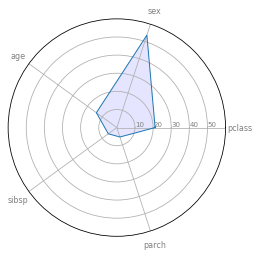

In [229]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
'pclass': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})
 
# number of variable
categories=['pclass', 'sex', 'age', 'sibsp', 'parch']
N = len(categories)

# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=[21.11, 53.61, 13.97, 5.84, 5.46]
print(values)
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30,40,50], ["10","20","30", "40", "50"], color="grey", size=7)
plt.ylim(0,60)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'b', alpha=0.1)

# Show the graph
plt.show()